# Traitement statistique des données ( Séance 6)


# Exercice 1
Dans cet exemple, X_train et Y_train sont les ensembles de données utilisés pour entraîner le modèle de classification. X_train représente l'ensemble des emails, Y_train représente les étiquettes associées à chaque email : urgent, normal, spam.

# Exercice 2
Pour calculer les effectifs marginaux, ce qui signifie le total de prédictions et de valeurs réelles pour chaque classe. On additionne les valeurs par ligne pour les vrais totaux et par colonne pour les totaux prédits. 

Effectifs marginaux des vrais labels (par ligne) :

* Urgent : 8+10+1=19
* Normal : 5+60+50= 115
* Spam :  3+30+200= 233

Effectifs marginaux des prédictions (par colonne) :

* Urgent : 8+5+3=16
* Normal : 10+60+30=100
* Spam : 1+50+200=251

Nombre total de mails utilisés pour la phase de test :
* 19+115+233=367
* 16+100+251=367


Accuracy:
$$
\text{Accuracy} = \frac{8 + 60 + 200}{8 + 10 + 1 + 5 + 60 + 50 + 3 + 30 + 200}
$$


$$ 0 \leq \text{accuracy} = \frac{268}{367} \leq 1 $$

Plus accuracy proche du 1 meilleur est le modèle

Recall pour 'urgent':
$$
\text{Recall}_{\text{urgent}} = \frac{8}{8 + 5 + 3}=\frac{8}{16} 
$$

Recall pour 'normal':
$$
\text{Recall}_{\text{normal}} =  \frac{60}{10 + 60 + 30}=\frac{60}{100} 
$$

Recall pour 'spam':
$$
\text{Recall}_{\text{spam}} =  \frac{200}{1 + 50 + 200}=\frac{200}{251} 
$$

Precision pour 'urgent':
$$
\text{Precision}_{\text{urgent}} = \frac{8}{8 + 10 + 1} = \frac{8}{19}
$$

Precision pour 'normal':
$$
\text{Precision}_{\text{normal}} = \frac{60}{5 + 60 + 50} = \frac{60}{115}
$$

Precision pour 'spam':
$$
\text{Precision}_{\text{spam}} = \frac{200}{3 + 30 + 200} = \frac{200}{233}
$$




# Exercice 4 :

Pour déterminer une taille optimale pour l'échantillon d'entraînement, on essaye d'optimiser l'accuracy en fonction de la taille. Pour cela on peut tracer une courbe de l'accuracy en fonction de différentes tailles d'échantillons d'entraînement.

# Exercice 5 :
Pour la taille du testset, on observe comment l'accuracy varie en fonction de la proportion de données utilisées pour le test, on vérifie si on peut avoir une taille minimale avec une accuracy maximale.

In [2]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [1]:
# on reprend le même corpus que dans la séance 5
corpus = [
    "Deep learning has made significant progress in recent years, and has even outperformed humans on many tasks like image classification.",
    "Similarly, the success of reinforcement learning to show super-human performance in some games that require sequential planning has been quite extraordinary.",
    "Therefore, it is tempting to posit that artificial intelligence might eventually come close to or even exceed the abilities of humans in a more generic way. ",
    "However, there are several fundamental technical hurdles that need to be crossed before we can build machines that learn and think like people."
]

In [8]:
# Tokenisation du corpus
# instanciation
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1
print(total_words)
print(tokenizer.word_index)
print(np.shape(tokenizer.word_index)) # ()
# Création de séquences d'entrée et de sortie
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)
print(line)
print(tokenizer.texts_to_sequences([line]))
print(token_list)
#print(np.shape(input_sequences,dtype=object)) # (87,26)
print(n_gram_sequence)
print(input_sequences)
# Remplissage des séquences pour les rendre de même longueur
max_sequence_length = max([len(seq) for seq in input_sequences])
input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_length, padding='pre')

print(max_sequence_length)
print(np.shape(input_sequences)) # (87,26)
print(input_sequences)
# Séparation des séquences en entrées et sorties
X, y = input_sequences[:, :-1], input_sequences[:, -1]
print(np.shape(X)) # (87,25)
print(X)
print(np.shape(y)) # (87,)
print(y)
# Conversion des sorties au format one-hot encoding
y = tf.keras.utils.to_categorical(y, num_classes=total_words)
print(y)
print(np.shape(y)) # (87,75)
# Définition du modèle LSTM
model = Sequential()
model.add(Embedding(total_words, 50, input_length=max_sequence_length-1))
model.add(LSTM(100))
model.add(Dense(total_words, activation='softmax'))
# Compilation du modèle
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

75
{'to': 1, 'that': 2, 'has': 3, 'in': 4, 'learning': 5, 'and': 6, 'even': 7, 'humans': 8, 'like': 9, 'the': 10, 'of': 11, 'deep': 12, 'made': 13, 'significant': 14, 'progress': 15, 'recent': 16, 'years': 17, 'outperformed': 18, 'on': 19, 'many': 20, 'tasks': 21, 'image': 22, 'classification': 23, 'similarly': 24, 'success': 25, 'reinforcement': 26, 'show': 27, 'super': 28, 'human': 29, 'performance': 30, 'some': 31, 'games': 32, 'require': 33, 'sequential': 34, 'planning': 35, 'been': 36, 'quite': 37, 'extraordinary': 38, 'therefore': 39, 'it': 40, 'is': 41, 'tempting': 42, 'posit': 43, 'artificial': 44, 'intelligence': 45, 'might': 46, 'eventually': 47, 'come': 48, 'close': 49, 'or': 50, 'exceed': 51, 'abilities': 52, 'a': 53, 'more': 54, 'generic': 55, 'way': 56, 'however': 57, 'there': 58, 'are': 59, 'several': 60, 'fundamental': 61, 'technical': 62, 'hurdles': 63, 'need': 64, 'be': 65, 'crossed': 66, 'before': 67, 'we': 68, 'can': 69, 'build': 70, 'machines': 71, 'learn': 72, 'th

In [9]:
# Division de X et y en train et test
from sklearn.model_selection import train_test_split

In [10]:
# Supposons que X et y sont vos tableaux d'entrée et de sortie
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(np.shape(X_train)) # (69,25)
print(np.shape(X_test)) # (18,25)
print(np.shape(y_train)) # (69,75)
print(np.shape(y_test)) # (18,75)

(69, 25)
(18, 25)
(69, 75)
(18, 75)


# EXRECICE 6
test_size=0.2 indique que 20\% des données sont utilisées pour le test et random_state=42 assure que le programme sera réexécutable et donne les même résultats (en utilisant un tirage figé)

In [11]:
# Entraînement du modèle
model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
3/3 [==============================] - 2s 16ms/step - loss: 4.3174 - accuracy: 0.0290
Epoch 2/100
3/3 [==============================] - 0s 14ms/step - loss: 4.3076 - accuracy: 0.0580
Epoch 3/100
3/3 [==============================] - 0s 12ms/step - loss: 4.2991 - accuracy: 0.0435
Epoch 4/100
3/3 [==============================] - 0s 17ms/step - loss: 4.2869 - accuracy: 0.0580
Epoch 5/100
3/3 [==============================] - 0s 9ms/step - loss: 4.2669 - accuracy: 0.0580
Epoch 6/100
3/3 [==============================] - 0s 13ms/step - loss: 4.2345 - accuracy: 0.0580
Epoch 7/100
3/3 [==============================] - 0s 17ms/step - loss: 4.1491 - accuracy: 0.0725
Epoch 8/100
3/3 [==============================] - 0s 18ms/step - loss: 4.1043 - accuracy: 0.0580
Epoch 9/100
3/3 [==============================] - 0s 18ms/step - loss: 4.0642 - accuracy: 0.0580
Epoch 10/100
3/3 [==============================] - 0s 12ms/step - loss: 4.0277 - accuracy: 0.0580
Epoch 11/100
3/3 [==

Epoch 84/100
3/3 [==============================] - 0s 8ms/step - loss: 1.5720 - accuracy: 0.6232
Epoch 85/100
3/3 [==============================] - 0s 16ms/step - loss: 1.5652 - accuracy: 0.6377
Epoch 86/100
3/3 [==============================] - 0s 16ms/step - loss: 1.5597 - accuracy: 0.6087
Epoch 87/100
3/3 [==============================] - 0s 8ms/step - loss: 1.5347 - accuracy: 0.6232
Epoch 88/100
3/3 [==============================] - 0s 16ms/step - loss: 1.5290 - accuracy: 0.6232
Epoch 89/100
3/3 [==============================] - 0s 8ms/step - loss: 1.5140 - accuracy: 0.6377
Epoch 90/100
3/3 [==============================] - 0s 8ms/step - loss: 1.4923 - accuracy: 0.6087
Epoch 91/100
3/3 [==============================] - 0s 16ms/step - loss: 1.4633 - accuracy: 0.6232
Epoch 92/100
3/3 [==============================] - 0s 16ms/step - loss: 1.4688 - accuracy: 0.6232
Epoch 93/100
3/3 [==============================] - 0s 17ms/step - loss: 1.4750 - accuracy: 0.6812
Epoch 94/100
3

In [12]:
# Evaluation du modèle
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 472ms/step - loss: 9.2451 - accuracy: 0.0000e+00


[9.245115280151367, 0.0]

# EXERCICE 7 
Une accuracy de 0%. Cela indique que le modèle n'a pas prédit correctement.
C'est un indicateur que le modèle ne fonctionne pas bien du tout sur les données de test fournies.

In [15]:
# Boucle pour graphique de accuracy en fonction de la taille
test_sizes = np.arange(0.1, 0.9, 0.1)
accuracies = []
losses= []
for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    model.fit(X_train, y_train, epochs=100, verbose=1)
    loss, accuracy = model.evaluate(X_test,y_test,verbose=0)
    accuracies.append(accuracy)
    losses.append(loss)

print("Losses =",losses,"Accuracies =", accuracies)

Epoch 1/100
3/3 [==============================] - 0s 17ms/step - loss: 2.2401 - accuracy: 0.4615
Epoch 2/100
3/3 [==============================] - 0s 8ms/step - loss: 1.9036 - accuracy: 0.5128
Epoch 3/100
3/3 [==============================] - 0s 10ms/step - loss: 1.5328 - accuracy: 0.5769
Epoch 4/100
3/3 [==============================] - 0s 8ms/step - loss: 1.2872 - accuracy: 0.6282
Epoch 5/100
3/3 [==============================] - 0s 16ms/step - loss: 1.0583 - accuracy: 0.6923
Epoch 6/100
3/3 [==============================] - 0s 11ms/step - loss: 0.9122 - accuracy: 0.7179
Epoch 7/100
3/3 [==============================] - 0s 9ms/step - loss: 0.7783 - accuracy: 0.7949
Epoch 8/100
3/3 [==============================] - 0s 17ms/step - loss: 0.7150 - accuracy: 0.8077
Epoch 9/100
3/3 [==============================] - 0s 16ms/step - loss: 0.6308 - accuracy: 0.8590
Epoch 10/100
3/3 [==============================] - 0s 10ms/step - loss: 0.5711 - accuracy: 0.9231
Epoch 11/100
3/3 [====

3/3 [==============================] - 0s 9ms/step - loss: 0.0933 - accuracy: 1.0000
Epoch 85/100
3/3 [==============================] - 0s 17ms/step - loss: 0.0924 - accuracy: 1.0000
Epoch 86/100
3/3 [==============================] - 0s 8ms/step - loss: 0.0916 - accuracy: 1.0000
Epoch 87/100
3/3 [==============================] - 0s 18ms/step - loss: 0.0897 - accuracy: 1.0000
Epoch 88/100
3/3 [==============================] - 0s 9ms/step - loss: 0.0889 - accuracy: 1.0000
Epoch 89/100
3/3 [==============================] - 0s 17ms/step - loss: 0.0889 - accuracy: 1.0000
Epoch 90/100
3/3 [==============================] - 0s 9ms/step - loss: 0.0887 - accuracy: 1.0000
Epoch 91/100
3/3 [==============================] - 0s 8ms/step - loss: 0.0872 - accuracy: 1.0000
Epoch 92/100
3/3 [==============================] - 0s 9ms/step - loss: 0.0858 - accuracy: 1.0000
Epoch 93/100
3/3 [==============================] - 0s 16ms/step - loss: 0.0851 - accuracy: 1.0000
Epoch 94/100
3/3 [===========

3/3 [==============================] - 0s 10ms/step - loss: 0.0335 - accuracy: 1.0000
Epoch 68/100
3/3 [==============================] - 0s 7ms/step - loss: 0.0333 - accuracy: 1.0000
Epoch 69/100
3/3 [==============================] - 0s 15ms/step - loss: 0.0331 - accuracy: 1.0000
Epoch 70/100
3/3 [==============================] - 0s 10ms/step - loss: 0.0328 - accuracy: 1.0000
Epoch 71/100
3/3 [==============================] - 0s 8ms/step - loss: 0.0326 - accuracy: 1.0000
Epoch 72/100
3/3 [==============================] - 0s 16ms/step - loss: 0.0325 - accuracy: 1.0000
Epoch 73/100
3/3 [==============================] - 0s 9ms/step - loss: 0.0324 - accuracy: 1.0000
Epoch 74/100
3/3 [==============================] - 0s 8ms/step - loss: 0.0323 - accuracy: 1.0000
Epoch 75/100
3/3 [==============================] - 0s 18ms/step - loss: 0.0321 - accuracy: 1.0000
Epoch 76/100
3/3 [==============================] - 0s 9ms/step - loss: 0.0318 - accuracy: 1.0000
Epoch 77/100
3/3 [==========

2/2 [==============================] - 0s 18ms/step - loss: 0.0189 - accuracy: 1.0000
Epoch 51/100
2/2 [==============================] - 0s 15ms/step - loss: 0.0188 - accuracy: 1.0000
Epoch 52/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0188 - accuracy: 1.0000
Epoch 53/100
2/2 [==============================] - 0s 17ms/step - loss: 0.0187 - accuracy: 1.0000
Epoch 54/100
2/2 [==============================] - 0s 0s/step - loss: 0.0186 - accuracy: 1.0000
Epoch 55/100
2/2 [==============================] - 0s 16ms/step - loss: 0.0185 - accuracy: 1.0000
Epoch 56/100
2/2 [==============================] - 0s 17ms/step - loss: 0.0185 - accuracy: 1.0000
Epoch 57/100
2/2 [==============================] - 0s 17ms/step - loss: 0.0184 - accuracy: 1.0000
Epoch 58/100
2/2 [==============================] - 0s 13ms/step - loss: 0.0183 - accuracy: 1.0000
Epoch 59/100
2/2 [==============================] - 0s 3ms/step - loss: 0.0182 - accuracy: 1.0000
Epoch 60/100
2/2 [=========

2/2 [==============================] - 0s 14ms/step - loss: 0.0129 - accuracy: 1.0000
Epoch 34/100
2/2 [==============================] - 0s 17ms/step - loss: 0.0129 - accuracy: 1.0000
Epoch 35/100
2/2 [==============================] - 0s 16ms/step - loss: 0.0128 - accuracy: 1.0000
Epoch 36/100
2/2 [==============================] - 0s 16ms/step - loss: 0.0128 - accuracy: 1.0000
Epoch 37/100
2/2 [==============================] - 0s 968us/step - loss: 0.0127 - accuracy: 1.0000
Epoch 38/100
2/2 [==============================] - 0s 17ms/step - loss: 0.0127 - accuracy: 1.0000
Epoch 39/100
2/2 [==============================] - 0s 15ms/step - loss: 0.0126 - accuracy: 1.0000
Epoch 40/100
2/2 [==============================] - 0s 17ms/step - loss: 0.0126 - accuracy: 1.0000
Epoch 41/100
2/2 [==============================] - 0s 15ms/step - loss: 0.0125 - accuracy: 1.0000
Epoch 42/100
2/2 [==============================] - 0s 4ms/step - loss: 0.0125 - accuracy: 1.0000
Epoch 43/100
2/2 [=====

2/2 [==============================] - 0s 19ms/step - loss: 0.0090 - accuracy: 1.0000
Epoch 17/100
2/2 [==============================] - 0s 16ms/step - loss: 0.0089 - accuracy: 1.0000
Epoch 18/100
2/2 [==============================] - 0s 17ms/step - loss: 0.0089 - accuracy: 1.0000
Epoch 19/100
2/2 [==============================] - 0s 13ms/step - loss: 0.0088 - accuracy: 1.0000
Epoch 20/100
2/2 [==============================] - 0s 4ms/step - loss: 0.0088 - accuracy: 1.0000
Epoch 21/100
2/2 [==============================] - 0s 18ms/step - loss: 0.0087 - accuracy: 1.0000
Epoch 22/100
2/2 [==============================] - 0s 17ms/step - loss: 0.0087 - accuracy: 1.0000
Epoch 23/100
2/2 [==============================] - 0s 17ms/step - loss: 0.0086 - accuracy: 1.0000
Epoch 24/100
2/2 [==============================] - 0s 0s/step - loss: 0.0086 - accuracy: 1.0000
Epoch 25/100
2/2 [==============================] - 0s 1ms/step - loss: 0.0086 - accuracy: 1.0000
Epoch 26/100
2/2 [=========

2/2 [==============================] - 0s 10ms/step - loss: 0.0064 - accuracy: 1.0000
Epoch 100/100
2/2 [==============================] - 0s 12ms/step - loss: 0.0064 - accuracy: 1.0000
Epoch 1/100
2/2 [==============================] - 0s 10ms/step - loss: 0.0064 - accuracy: 1.0000
Epoch 2/100
2/2 [==============================] - 0s 10ms/step - loss: 0.0064 - accuracy: 1.0000
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 0.0063 - accuracy: 1.0000
Epoch 4/100
2/2 [==============================] - 0s 10ms/step - loss: 0.0063 - accuracy: 1.0000
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 0.0063 - accuracy: 1.0000
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 0.0062 - accuracy: 1.0000
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 0.0062 - accuracy: 1.0000
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 0.0062 - accuracy: 1.0000
Epoch 9/100
2/2 [==================

2/2 [==============================] - 0s 16ms/step - loss: 0.0045 - accuracy: 1.0000
Epoch 83/100
2/2 [==============================] - 0s 16ms/step - loss: 0.0045 - accuracy: 1.0000
Epoch 84/100
2/2 [==============================] - 0s 16ms/step - loss: 0.0045 - accuracy: 1.0000
Epoch 85/100
2/2 [==============================] - 0s 0s/step - loss: 0.0045 - accuracy: 1.0000
Epoch 86/100
2/2 [==============================] - 0s 0s/step - loss: 0.0044 - accuracy: 1.0000
Epoch 87/100
2/2 [==============================] - 0s 16ms/step - loss: 0.0044 - accuracy: 1.0000
Epoch 88/100
2/2 [==============================] - 0s 20ms/step - loss: 0.0044 - accuracy: 1.0000
Epoch 89/100
2/2 [==============================] - 0s 0s/step - loss: 0.0044 - accuracy: 1.0000
Epoch 90/100
2/2 [==============================] - 0s 16ms/step - loss: 0.0044 - accuracy: 1.0000
Epoch 91/100
2/2 [==============================] - 0s 16ms/step - loss: 0.0044 - accuracy: 1.0000
Epoch 92/100
2/2 [===========

1/1 [==============================] - 0s 20ms/step - loss: 0.0036 - accuracy: 1.0000
Epoch 66/100
1/1 [==============================] - 0s 16ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 67/100
1/1 [==============================] - 0s 16ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 68/100
1/1 [==============================] - 0s 16ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 69/100
1/1 [==============================] - 0s 16ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 70/100
1/1 [==============================] - 0s 16ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 71/100
1/1 [==============================] - 0s 16ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 72/100
1/1 [==============================] - 0s 16ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 73/100
1/1 [==============================] - 0s 16ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 74/100
1/1 [==============================] - 0s 0s/step - loss: 0.0035 - accuracy: 1.0000
Epoch 75/100
1/1 [=======

1/1 [==============================] - 0s 16ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 49/100
1/1 [==============================] - 0s 16ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 50/100
1/1 [==============================] - 0s 16ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 51/100
1/1 [==============================] - 0s 16ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 52/100
1/1 [==============================] - 0s 16ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 53/100
1/1 [==============================] - 0s 16ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 54/100
1/1 [==============================] - 0s 16ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 55/100
1/1 [==============================] - 0s 16ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 56/100
1/1 [==============================] - 0s 16ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 57/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 58/100
1/1 [=====

# Exercice 8 : Comparaison des deux méthodes d'entraînement


Les deux méthodes d'entraînement ont donné des résultats très différents. Le premier modèle a montré une précision de 0% lors de l'évaluation, tandis que le deuxième modèle a atteint une précision de 100% sur l'ensemble de test. Cette différence extrême suggère que soit le deuxième modèle est surajusté aux données d'entraînement, soit le premier modèle n'a pas du tout appris les caractéristiques des données.

Pour améliorer le modèle, on peut évaluer la représentativité des données 
Par exemple: on vérifie que les données de test et d'entraînement sont bien distribuées et représentent la réalité du problème.

# Exercice 9 : Optimisation de la taille de l'échantillon de test

Pour optimiser la taille de l'échantillon de test, on peut procéder comme suit :

Tester différentes tailles : Utilisez une série de proportions différentes pour l'échantillon de test (par exemple, de 10% à 30%) et évaluez la performance du modèle pour chaque taille.

Évaluer la stabilité des performances : Recherchez la taille de l'échantillon de test pour laquelle la précision du modèle est la plus stable et la plus élevée lors de tests répétés.

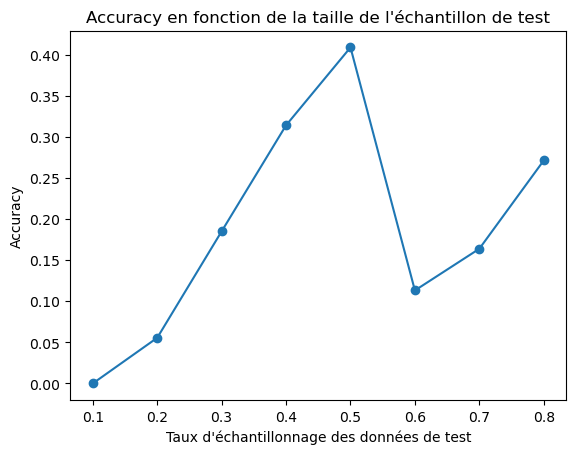

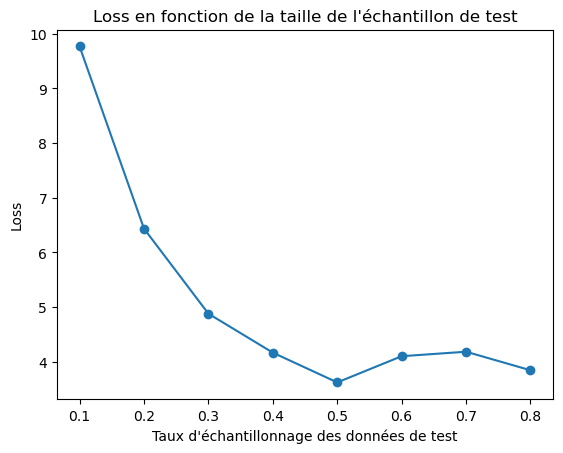

In [14]:
# Graphique des accuracies
plt.plot(test_sizes, accuracies, marker='o')
plt.title('Accuracy en fonction de la taille de l\'échantillon de test')
plt.xlabel('Taux d\'échantillonnage des données de test')
plt.ylabel('Accuracy')
plt.show()
# Graphique des losses
fig=plt.figure()
plt.plot(test_sizes, losses, marker='o')
plt.title('Loss en fonction de la taille de l\'échantillon de test')
plt.xlabel('Taux d\'échantillonnage des données de test')
plt.ylabel('Loss')
plt.show()

In [23]:
# Fonction pour générer du texte
def generate_text(seed_text, next_words, model, max_sequence_length):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_length-1, padding='pre')
        predicted_probs = model.predict(token_list, verbose=0)[0]
        predicted_index = np.argmax(predicted_probs)
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted_index:
                output_word = word
                break
        seed_text += " " + output_word
    return seed_text


In [27]:
# Génération de texte à partir d'une graine
generated_text = generate_text (" machine learning ",10 , model , max_sequence_length )
print ( generated_text )

 machine learning  has made significant made significant in recent years and has


# Exercice 11
Pour Comparer le résultat de cette fonction avec ces données d’entrée et celles ou on n’avait pas divisé les données en
entraınement et test (séance 5).

On peut dire que la prédiction sans divisiant était plus correcte.

In [29]:
new_seed_text = "deep learning now"
new_next_words = 15  # Générer 15 mots supplémentaires
generated_text = generate_text(new_seed_text, new_next_words, model, max_sequence_length)
print(generated_text)

deep learning now has made significant significant in recent years and has outperformed outperformed outperformed on many tasks
